<a href="https://colab.research.google.com/drive/1WVig4WGiru06wUbTdzKCzGH4X3rhJc2H">Abre este Jupyter en Google Colab</a>

# Comparación de algoritmos en el datset IRIS

## EDA

Primeras filas del DataFrame:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


/Users/gustavo.aguado/anaconda3/envs/base_ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/gustavo.aguado/anaconda3/envs/base_ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/gustavo.aguado/anaconda3/envs/base_ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/gustavo.aguado/anaconda3/envs/base_ml/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning

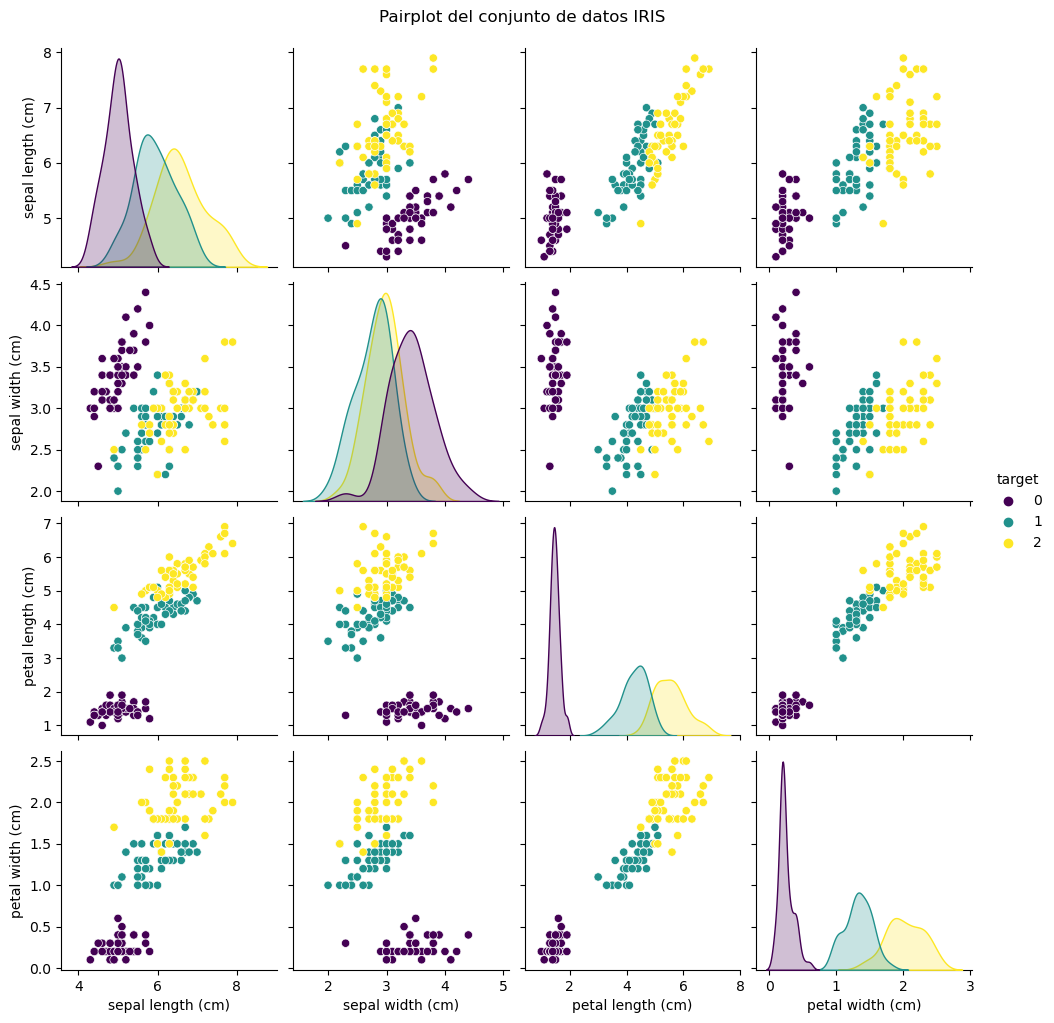

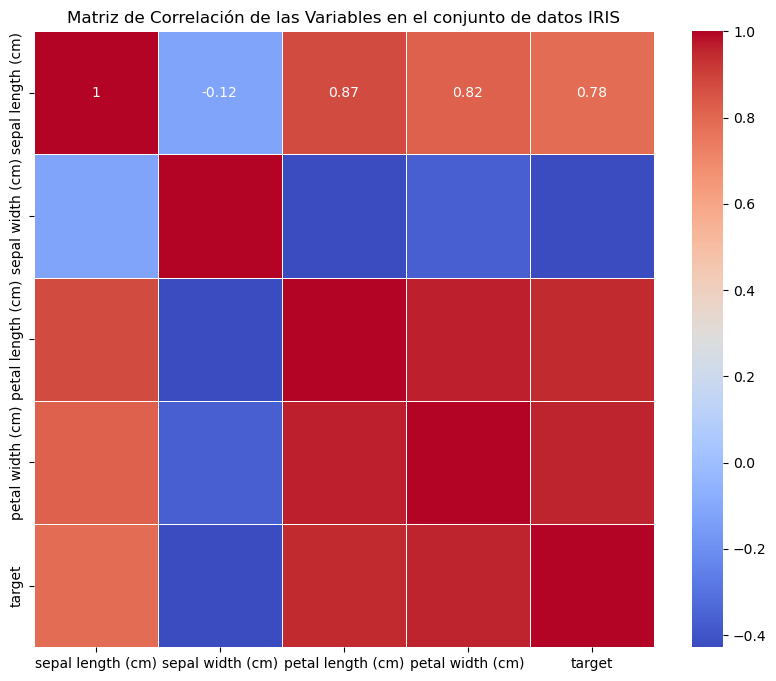

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Cargar el conjunto de datos IRIS
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Visualizar las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
print(iris_df.head())

# Realizar un pairplot para visualizar relaciones entre variables
sns.pairplot(iris_df, hue='target', palette='viridis')
plt.suptitle('Pairplot del conjunto de datos IRIS', y=1.02)
plt.show()

# Calcular la matriz de correlación
correlation_matrix = iris_df.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación de las Variables en el conjunto de datos IRIS')
plt.show()


Este conjunto de datos representa mediciones de cuatro características diferentes de flores iris, específicamente del género Setosa, Versicolor y Virginica. Aquí hay una descripción de las primeras filas del DataFrame:

sepal length (cm): Longitud del sépalo en centímetros.
sepal width (cm): Ancho del sépalo en centímetros.
petal length (cm): Longitud del pétalo en centímetros.
petal width (cm): Ancho del pétalo en centímetros.
target: Variable objetivo que representa la especie de la flor iris. Los valores son:
0: Setosa
1: Versicolor
2: Virginica
Cada fila del DataFrame corresponde a una observación de una flor iris, con las mediciones de sus sépalos y pétalos, así como la clasificación de la especie a la que pertenece. 

### Solapamiento de densidades:
Las variables con menor solapamiento de densidades, y que por tanto tendrán mayor poder predictivo sobre la clase son:
- petal length
- petal width

# Comparación entre Naive Bayes, Regresión logística y arbol de decisión

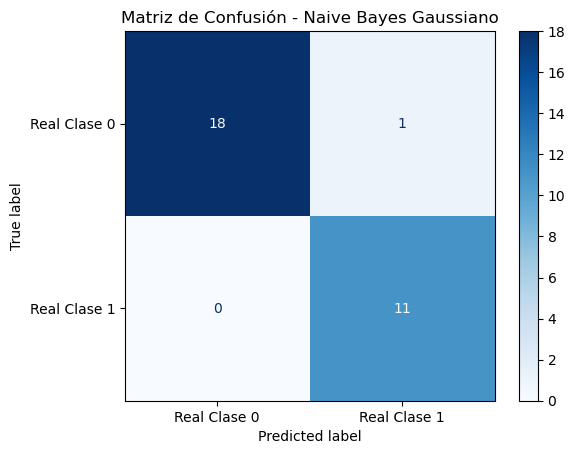

Resultados del modelo Naive Bayes Gaussiano:
Precisión: 0.97
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



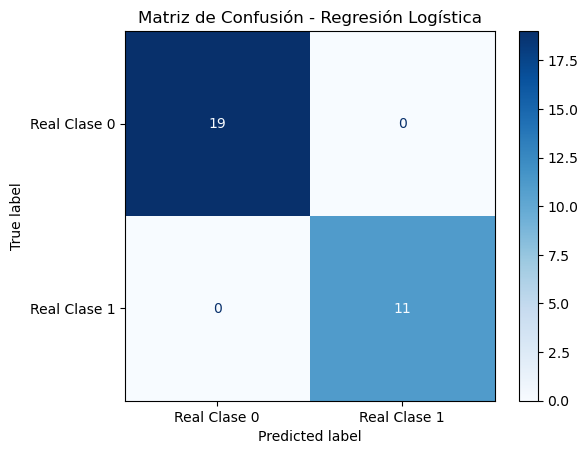

Resultados del modelo Regresión Logística:
Precisión: 1.00
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



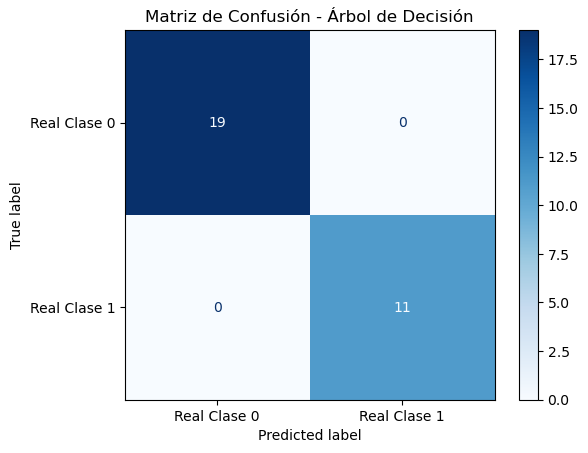

Resultados del modelo Árbol de Decisión:
Precisión: 1.00
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



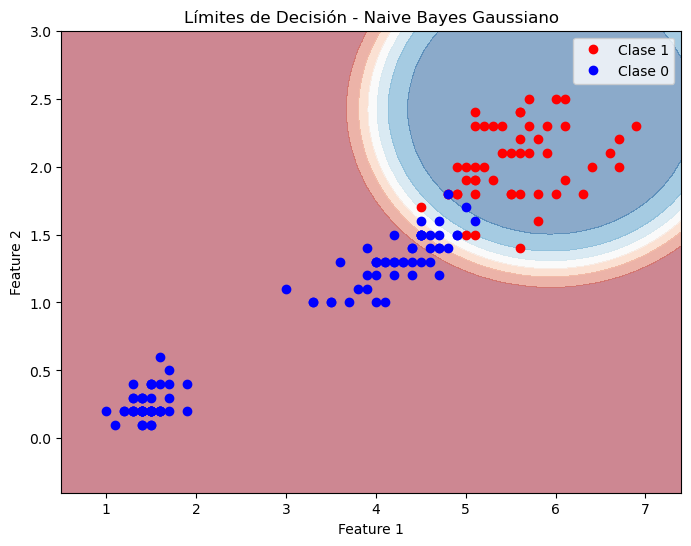

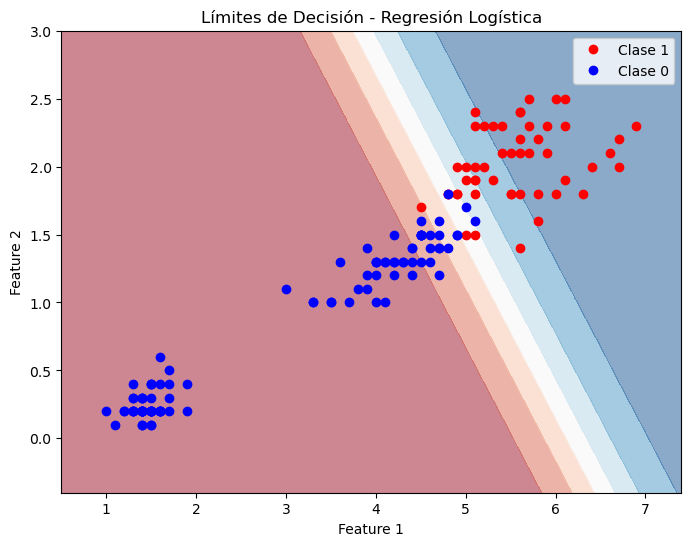

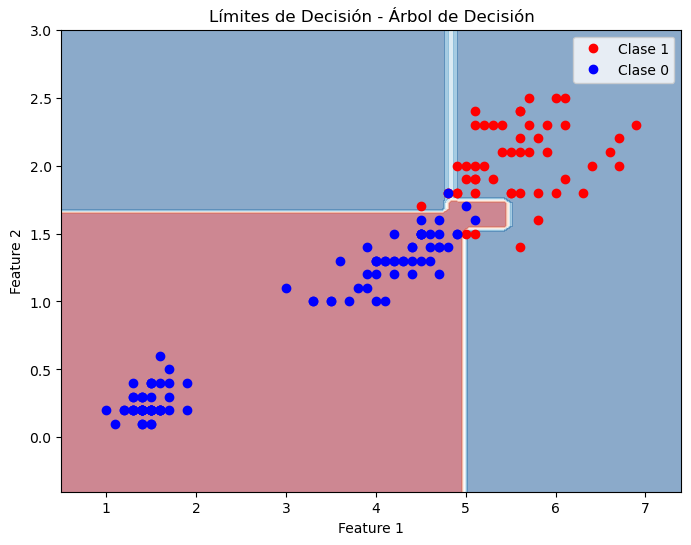

In [3]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Descargar el conjunto de datos Iris
iris = load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int64)  # Convertir a 0 o 1

# Separar el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Función para entrenar y evaluar un modelo
def train_and_evaluate_model_with_confusion_matrix_display(model, X_train, y_train, X_test, y_test, model_name):
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Evaluar el modelo
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Crear matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    
    # Visualizar matriz de confusión con ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real Clase 0", "Real Clase 1"])
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.show()
    
    # Imprimir resultados
    print(f"Resultados del modelo {model_name}:")
    print(f"Precisión: {accuracy:.2f}")
    print("Reporte de clasificación:")
    print(report)

# Entrenar y evaluar el modelo Naive Bayes Gaussiano
gnb = GaussianNB()
train_and_evaluate_model_with_confusion_matrix_display(gnb, X_train, y_train, X_test, y_test, "Naive Bayes Gaussiano")

# Entrenar y evaluar el modelo Regresión Logística
lr = LogisticRegression()
train_and_evaluate_model_with_confusion_matrix_display(lr, X_train, y_train, X_test, y_test, "Regresión Logística")

# Entrenar y evaluar un modelo de árbol de decisión para tres categorías
dtc = DecisionTreeClassifier(random_state=42)
train_and_evaluate_model_with_confusion_matrix_display(dtc, X_train, y_train, X_test, y_test, "Árbol de Decisión")

# Visualizar los límites de decisión para los modelos
def plot_decision_boundary(X, y, clf, title):
    mins = X.min(axis=0) - 0.5
    maxs = X.max(axis=0) + 0.5

    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 71),
                         np.linspace(mins[1], maxs[1], 81))
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap="RdBu", alpha=0.5)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'ro', label='Clase 1')
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bo', label='Clase 0')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Visualizar límites de decisión para Naive Bayes Gaussiano
plot_decision_boundary(X, y, gnb, "Límites de Decisión - Naive Bayes Gaussiano")

# Visualizar límites de decisión para Regresión Logística
plot_decision_boundary(X, y, lr, "Límites de Decisión - Regresión Logística")

# Visualizar límites de decisión para Árbol de Decisión
plot_decision_boundary(X, y, dtc, "Límites de Decisión - Árbol de Decisión")


## Evaluación de Modelos de Clasificación

En general los tres modelos consiguen un gran resultado en el conjunto de test, las matrices de confusion muestran que tanto la regresión logistica como el arbol de decisión no cometen fallos en el conjunto de test. El naive bayes comete un único error. 

Naive Bayes Gaussiano:

El modelo de Naive Bayes Gaussiano ha demostrado un rendimiento sólido en la clasificación, con una precisión del 97%. En la clasificación binaria de dos clases (0 y 1), el modelo logra un equilibrio notable entre la capacidad de identificar positivos y negativos, alcanzando una precisión de aproximadamente el 92% para la clase 1 y un 100% para la clase 0. El rendimiento general del modelo, con una puntuación F1 cercana al 97%, sugiere que es capaz de proporcionar predicciones confiables en este conjunto de datos.

Regresión Logística:

La Regresión Logística ha exhibido un rendimiento excepcional, logrando una precisión del 100%. Esto indica que el modelo ha aprendido eficazmente la relación entre las características de entrada y la variable objetivo, proporcionando predicciones precisas en el conjunto de datos de prueba. La precisión del 100% para ambas clases (0 y 1) subraya la capacidad de este modelo para realizar predicciones precisas y fiables.

Árbol de Decisión:

Los resultados específicos del modelo de Árbol de Decisión muestran un rendimiento sobresaliente del modelo en la clasificación binaria de dos clases. Todas las métricas indican una capacidad excepcional para identificar correctamente ambas clases, con una precisión perfecta y un equilibrio óptimo entre precision y recall.

### Conclusión:
En general, todos los modelos han demostrado ser altamente efectivos en la clasificación de los datos de entrada. La elección considero que debería ser la regresión logística, ya que es el modelo más simple, tiene buenos resultados y divide el plano en una recta que es lo que sugiere el plot de los datos.

# Dataset con tres clases:

Primeras filas del DataFrame:
     0    1    2    3          4
0  5.1  3.5  1.4  0.2  I. setosa
1  4.9  3.0  1.4  0.2  I. setosa
2  4.7  3.2  1.3  0.2  I. setosa
3  4.6  3.1  1.5  0.2  I. setosa
4  5.0  3.6  1.4  0.2  I. setosa


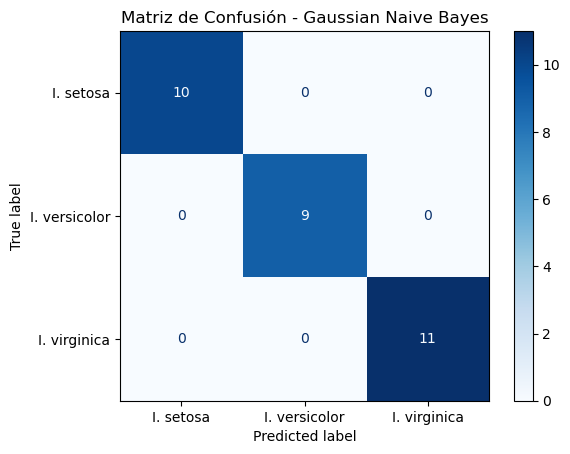

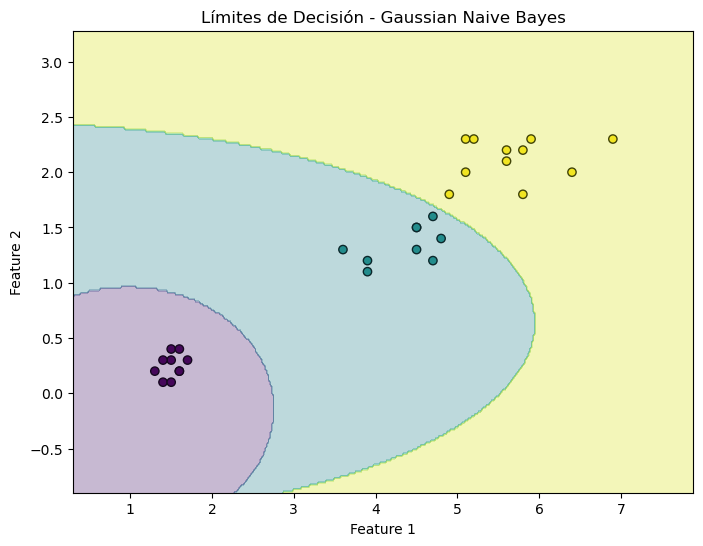

Resultados del modelo Gaussian Naive Bayes:
Precisión: 1.00
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



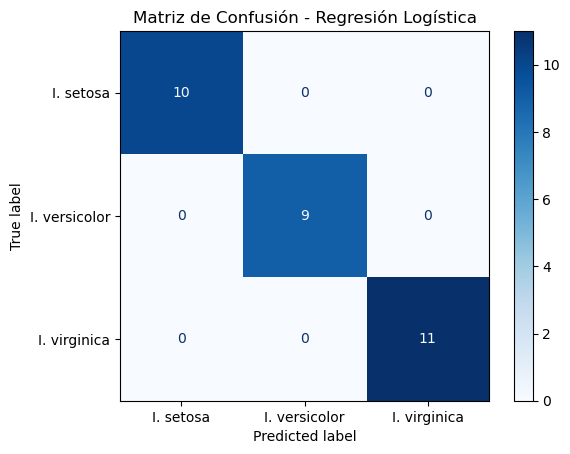

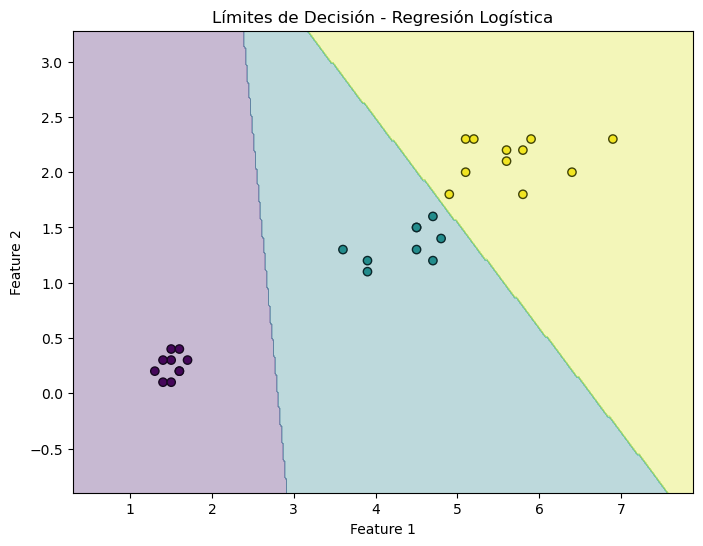

Resultados del modelo Regresión Logística:
Precisión: 1.00
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



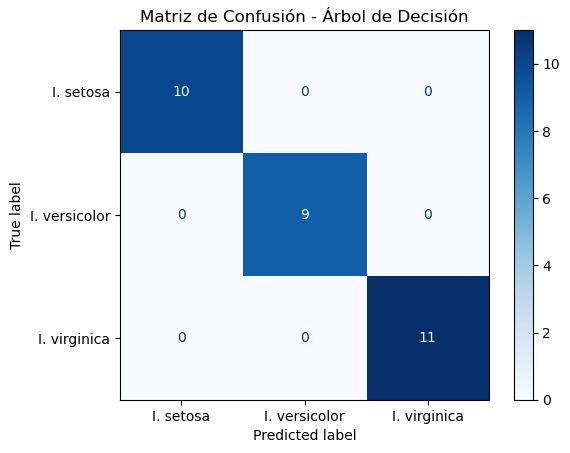

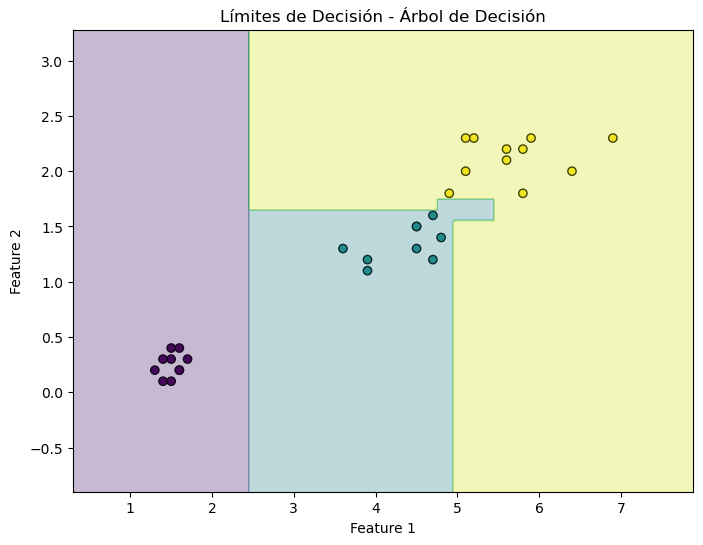

Resultados del modelo Árbol de Decisión:
Precisión: 1.00
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [4]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA
import seaborn as sns

# Cargar el conjunto de datos iris
iris_df = pd.read_csv('iris.csv', header=None, encoding='latin1', sep=';')

# Mostrar las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
print(iris_df.head())

# Extraer características (X) y variable objetivo (y)
X = iris_df.iloc[:, [2, 3]]  # Seleccionar dos características específicas
y = iris_df.iloc[:, -1]
# Codificar la variable objetivo usando LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Función para entrenar y evaluar un modelo con ConfusionMatrixDisplay y visualizar límites de decisión
def train_evaluate_plot_decision_boundary(model, X_train, y_train, X_test, y_test, model_name):
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Evaluar el modelo
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Crear matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    
    # Visualizar matriz de confusión con ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.show()
    
    # Visualizar límites de decisión
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap='viridis', marker='o', edgecolors='k')
    
    h = .02  # Tamaño del paso en la malla
    x_min, x_max = X_test.iloc[:, 0].min() - 1, X_test.iloc[:, 0].max() + 1
    y_min, y_max = X_test.iloc[:, 1].min() - 1, X_test.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.title(f'Límites de Decisión - {model_name}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
    
    # Imprimir resultados
    print(f"Resultados del modelo {model_name}:")
    print(f"Precisión: {accuracy:.2f}")
    print("Reporte de clasificación:")
    print(report)

# Entrenar y evaluar el modelo Gaussian Naive Bayes
gnb = GaussianNB()
train_evaluate_plot_decision_boundary(gnb, X_train, y_train, X_test, y_test, "Gaussian Naive Bayes")

# Entrenar y evaluar el modelo Logistic Regression
lr = LogisticRegression()
train_evaluate_plot_decision_boundary(lr, X_train, y_train, X_test, y_test, "Regresión Logística")

# Entrenar y evaluar un modelo Decision Tree para tres categorías
dtc = DecisionTreeClassifier(random_state=42)
train_evaluate_plot_decision_boundary(dtc, X_train, y_train, X_test, y_test, "Árbol de Decisión")




# Conclusión
Los resultados son excelentes para los tres modelos, ya que muestran todas sus métricas perfectas. Podría elegirse la regresión logística como modelo dado que es el más simple de los tres, a igualdad de resultados. 